In [33]:
import pandas_datareader as pdr

In [34]:
df=pdr.get_data_tiingo('AAPL',api_key='4e28cbeb6cdd9221115a4ace2572a1b37734ea43')

In [35]:
df.to_csv('AAPL.csv')

In [36]:
import pandas as pd

In [37]:
df=pd.read_csv('AAPL.csv')

In [38]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-22 00:00:00+00:00,108.51,109.10,107.85,108.860,25820230,25.436673,25.574980,25.281958,25.518720,103280920,0.0,1.0
1,AAPL,2016-08-23 00:00:00+00:00,108.85,109.32,108.53,108.590,21257669,25.516376,25.626552,25.441362,25.455427,85030676,0.0,1.0
2,AAPL,2016-08-24 00:00:00+00:00,108.03,108.75,107.68,108.565,23675081,25.324153,25.492934,25.242107,25.449566,94700324,0.0,1.0
3,AAPL,2016-08-25 00:00:00+00:00,107.57,107.88,106.68,107.390,25086248,25.216321,25.288990,25.007689,25.174126,100344992,0.0,1.0
4,AAPL,2016-08-26 00:00:00+00:00,106.94,107.95,106.31,107.410,27766291,25.068638,25.305400,24.920954,25.178814,111065164,0.0,1.0


In [39]:
df1=df.reset_index()['close']

In [40]:
df1[1228:]

1228    145.11
1229    144.50
1230    145.64
1231    149.15
1232    148.48
1233    146.39
1234    142.45
1235    146.15
1236    145.40
1237    146.80
1238    148.56
1239    148.99
1240    146.77
1241    144.98
1242    145.64
1243    145.86
1244    145.52
1245    147.36
1246    146.95
1247    147.06
1248    146.14
1249    146.09
1250    145.60
1251    145.86
1252    148.89
1253    149.10
1254    151.12
1255    150.19
1256    146.36
Name: close, dtype: float64

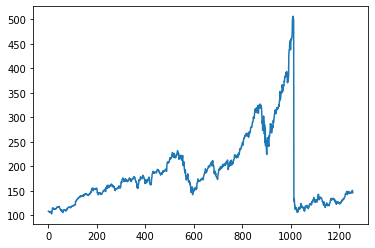

In [41]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [42]:
##LSTM are sensitive to the scale of the data,so we apply MinMaxscaler
import numpy as np

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [44]:
df1.shape

(1257, 1)

In [45]:
#splitting the data into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [46]:
training_size,test_size

(817, 440)

In [47]:
import numpy
#convert the array of values into dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [48]:
#reshape into x=t,t+1,t+2,t+3 and y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(train_data,time_step)

In [49]:
print(X_train)

[[0.0133512  0.01419496 0.01216002 0.01101846 0.00945503 0.00915724
  0.0071223  0.00737046 0.00893389 0.01141553 0.01134108 0.01297896
  0.00593111 0.         0.00573258 0.01196149 0.02144133 0.03087155
  0.02925849 0.0259331  0.02590828 0.02585865 0.028514   0.02377407
  0.02419595 0.02471709 0.0268513  0.0224588  0.02461783 0.02330256
  0.02449375 0.02461783 0.0267024  0.02712428 0.03206274 0.03268314
  0.03526405 0.03437066 0.03598372 0.03578519 0.03558666 0.03471809
  0.03456919 0.03342764 0.03603335 0.03752233 0.03092118 0.02816657
  0.02628052 0.02583383 0.02074648 0.02099464 0.01662696 0.01417014
  0.01806631 0.01967937 0.01923268 0.01156442 0.01315267 0.00640262
  0.00987691 0.01702402 0.01692476 0.01719774 0.02134207 0.02151578
  0.02010125 0.02149097 0.02094501 0.02067203 0.01833929 0.0157832
  0.01680068 0.01484018 0.01692476 0.01960492 0.02230991 0.0268513
  0.02523824 0.02992853 0.02992853 0.03149196 0.0318642  0.0335269
  0.03429621 0.03456919 0.03265833 0.0332291  0.035

In [52]:
#reshape input to be sample,time_step,features which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [53]:
#create lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=2)

Epoch 1/100
1/1 - 0s - loss: 6.3850e-10 - val_loss: 2.9149e-10
Epoch 2/100
1/1 - 0s - loss: 2.9149e-10 - val_loss: 2.7208e-09
Epoch 3/100
1/1 - 0s - loss: 2.7208e-09 - val_loss: 5.4853e-09
Epoch 4/100
1/1 - 0s - loss: 5.4853e-09 - val_loss: 6.3763e-09
Epoch 5/100
1/1 - 0s - loss: 6.3763e-09 - val_loss: 4.8862e-09
Epoch 6/100
1/1 - 0s - loss: 4.8862e-09 - val_loss: 2.2592e-09
Epoch 7/100
1/1 - 0s - loss: 2.2592e-09 - val_loss: 3.2927e-10
Epoch 8/100
1/1 - 0s - loss: 3.2927e-10 - val_loss: 1.4238e-10
Epoch 9/100
1/1 - 0s - loss: 1.4238e-10 - val_loss: 1.3558e-09
Epoch 10/100
1/1 - 0s - loss: 1.3558e-09 - val_loss: 2.7204e-09
Epoch 11/100
1/1 - 0s - loss: 2.7204e-09 - val_loss: 3.1104e-09
Epoch 12/100
1/1 - 0s - loss: 3.1104e-09 - val_loss: 2.3083e-09
Epoch 13/100
1/1 - 0s - loss: 2.3083e-09 - val_loss: 9.9513e-10
Epoch 14/100
1/1 - 0s - loss: 9.9513e-10 - val_loss: 1.0725e-10
Epoch 15/100
1/1 - 0s - loss: 1.0725e-10 - val_loss: 1.1808e-10
Epoch 16/100
1/1 - 0s - loss: 1.1808e-10 - val_lo

In [60]:
import tensorflow as tf


In [61]:
#lets do it the prediction and check performance matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#Transforing in original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [62]:
#Calculate RSME Performance matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2.526979414929631e-05

In [63]:
#test data RSME
math.sqrt(mean_squared_error(y_test,(test_predict)))

2.526979414929631e-05

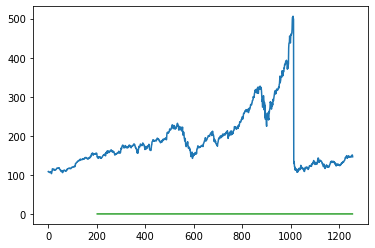

In [64]:
#shift train prediction for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test prediction for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plot base line and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [66]:
len(test_data)

440

In [67]:
441-100

341

In [68]:
X_input=test_data[341:].reshape(1,-1)
X_input.shape

(1, 99)

In [69]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [79]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):
    
    if(len(temp_input)>99):
        #print(temp_input)
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)




0 day input [0.04720071 0.04931011 0.05650685 0.05727616 0.06147012 0.06757495
 0.07411406 0.06975878 0.0776752  0.07171928 0.07784892 0.07700516
 0.07869267 0.07439944 0.07536728 0.07149593 0.07740222 0.07839488
 0.07757594 0.07556581 0.07531765 0.07030474 0.07298491 0.06134604
 0.06196645 0.06603633 0.0672027  0.0588644  0.05653167 0.04873933
 0.05419893 0.06035338 0.05742505 0.05390113 0.05350407 0.06000596
 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824 0.05330554
 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685 0.05859142
 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538
 0.07112368 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393
 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865
 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434
 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875
 0.10837304 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434
 0.1060403  0.10519655 0.10976276 0.10874528 0.1090

In [80]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [81]:
import matplotlib.pyplot as plt

In [82]:

len(df1)

1257

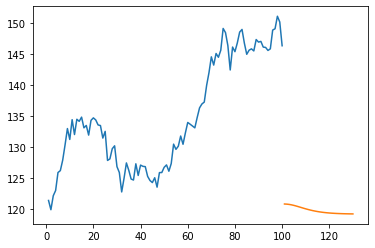

In [84]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

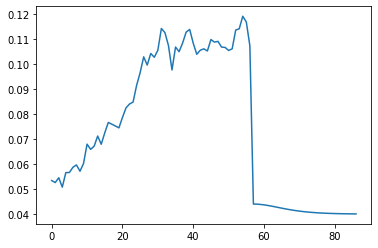

In [85]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [86]:
df3=scaler.inverse_transform(df3).tolist()

In [88]:
df3

[[108.50999999999999],
 [108.84999999999998],
 [108.03000000000002],
 [107.57],
 [106.94],
 [106.82000000000001],
 [106.0],
 [106.1],
 [106.73],
 [107.72999999999999],
 [107.70000000000002],
 [108.36000000000001],
 [105.52],
 [103.12999999999998],
 [105.44],
 [107.95],
 [111.77],
 [115.57000000000001],
 [114.92],
 [113.58],
 [113.57],
 [113.54999999999998],
 [114.62],
 [112.71],
 [112.88],
 [113.08999999999999],
 [113.94999999999999],
 [112.17999999999999],
 [113.05],
 [112.52],
 [113.0],
 [113.05],
 [113.89],
 [114.06],
 [116.05000000000001],
 [116.30000000000001],
 [117.33999999999999],
 [116.98000000000002],
 [117.63],
 [117.55],
 [117.46999999999998],
 [117.12],
 [117.05999999999999],
 [116.6],
 [117.65],
 [118.25000000000001],
 [115.59000000000002],
 [114.47999999999999],
 [113.72000000000001],
 [113.54000000000002],
 [111.49],
 [111.59],
 [109.82999999999998],
 [108.83999999999999],
 [110.41000000000001],
 [111.06],
 [110.88],
 [107.79],
 [108.43000000000002],
 [105.7099999999999

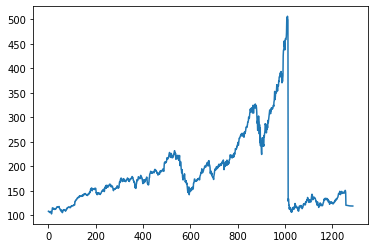

In [89]:
plt.plot(df3)